In [35]:
%pylab inline
import numpy as np
from scipy import linalg as la
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
import sys


Populating the interactive namespace from numpy and matplotlib


In [36]:

#########INTEGRATION########################
from scipy.interpolate import UnivariateSpline

def Ninteg(x,func,x0,xf,dx):
    spl = UnivariateSpline(x,func, k=5, s=0)
    intfunc=np.zeros(np.size(xf))
    for i in range(np.size(xf)):
        intfunc[i]=spl.integral(x0, xf[i])

    return intfunc

def Ninteg2(x,func,xi,xf,dx):
    spl = UnivariateSpline(x,func, k=5, s=0)
    intfunc=spl.integral(xi, xf)
    return intfunc


#############################################


In [52]:

steps=5000

hbar=1.0
m=1.0
W=10.0
d=0.0005
cent=-0.0
# divide by two so a well from -W to W is of input width
W=W/2.0
# create x-vector from -W to W
xvec=np.linspace(-W,W,steps)
# get step size
h=xvec[1]-xvec[0]
VI=-(1/np.sqrt(2*np.pi*d**2))*np.exp(-xvec**2 /(2* d**2))
LaplacianP=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)
        +np.diag(np.ones(steps-1),-1))/(float)(h**2)
    # create Hamiltonian
LaplacianP[0,-1]=1/(float)(h**2)
LaplacianP[-1,0]=1/(float)(h**2)
Hamiltonian=((-0.5*(hbar**2)/m))*LaplacianP + np.diag(VI)


valuesI=la.eigh(Hamiltonian)

-0.09767583521510377


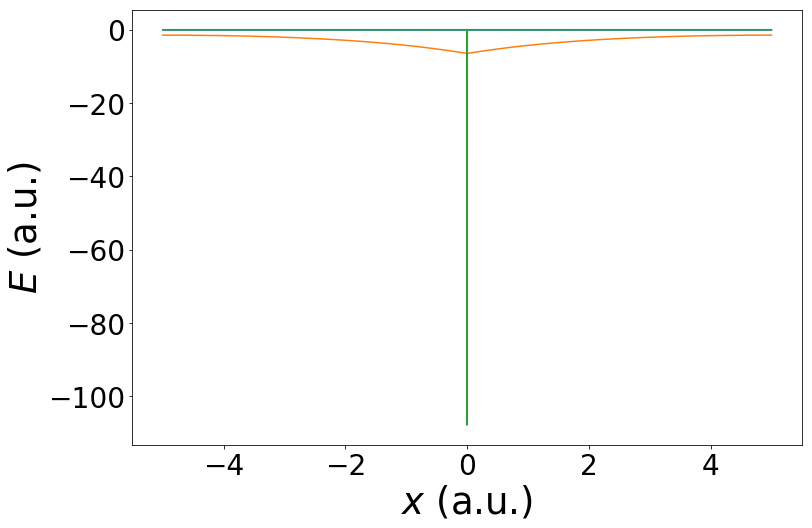

In [56]:
for i in range(0,1):
    
    plot(xvec,valuesI[0][i]*xvec/xvec)
    plot(xvec,10*(valuesI[1].T)[0]/np.sqrt( Ninteg2(xvec,(valuesI[1].T)[0]**2,-W,W,h) )+valuesI[0][i])
    

    print(valuesI[0][i])
plot(xvec,VI)
ylabel("$E$ (a.u.)",size=37)
xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 28})

In [54]:
valuesI[0][1]

0.11627838123880707

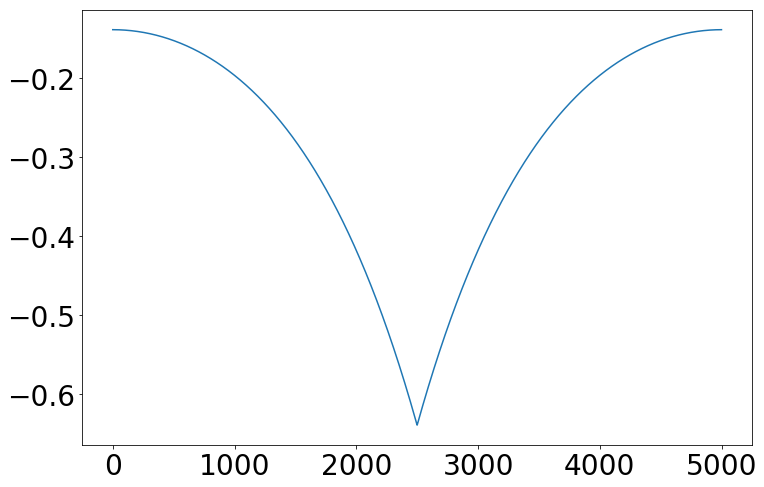

In [55]:
plot((valuesI[1].T)[0]/np.sqrt( Ninteg2(xvec,(valuesI[1].T)[0]**2,-W,W,h) ))

In [62]:
Eigfuns=[]
Eigvals=[]
for steps in([1000,2000,3000,4000,5000,7000,10000,12000]):
    hbar=1.0
    m=1.0
    W=10.0
    d=0.0005
    cent=-0.0
    # divide by two so a well from -W to W is of input width
    W=W/2.0
    # create x-vector from -W to W
    xvec=np.linspace(-W,W,steps)
    # get step size
    h=xvec[1]-xvec[0]
    VI=-(1/np.sqrt(2*np.pi*d**2))*np.exp(-xvec**2 /(2* d**2))
    LaplacianP=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)
        +np.diag(np.ones(steps-1),-1))/(float)(h**2)
    # create Hamiltonian
    LaplacianP[0,-1]=1/(float)(h**2)
    LaplacianP[-1,0]=1/(float)(h**2)
    Hamiltonian=((-0.5*(hbar**2)/m))*LaplacianP + np.diag(VI)


    valuesI=la.eigh(Hamiltonian)
    Eigfuns.append((valuesI[1].T)[0]/np.sqrt( Ninteg2(xvec,(valuesI[1].T)[0]**2,-W,W,h) ))
    Eigvals.append(valuesI[0][0:5])

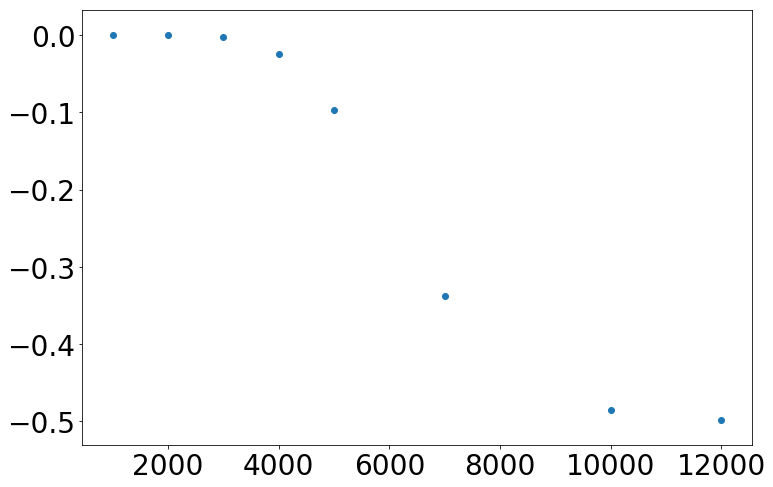

In [82]:
scatter( [1000,2000,3000,4000,5000,7000,10000,12000],array(Eigvals).T[:][0])

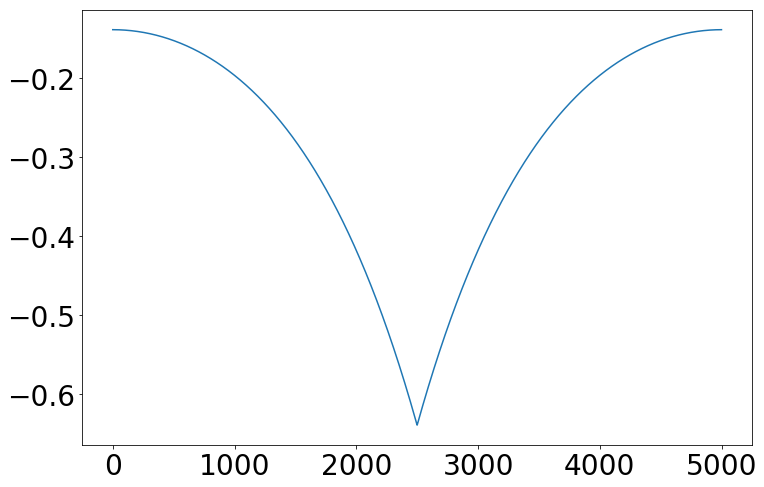

In [90]:
plot(Eigfuns[4])

In [60]:
steps=5000

hbar=1.0
m=1.0
W=10.0
d=0.0005
cent=-0.0
# divide by two so a well from -W to W is of input width
W=W/2.0
R=1
# create x-vector from -W to W
xvec=np.linspace(-W,W,steps)
# get step size
h=xvec[1]-xvec[0]
VI=-(1/np.sqrt(2*np.pi*d**2))*np.exp(-(xvec-R/2)**2 /(2* d**2))-(1/np.sqrt(2*np.pi*d**2))*np.exp(-(xvec+R/2)**2 /(2* d**2))
LaplacianP=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)
        +np.diag(np.ones(steps-1),-1))/(float)(h**2)
    # create Hamiltonian
LaplacianP[0,-1]=1/(float)(h**2)
LaplacianP[-1,0]=1/(float)(h**2)
Hamiltonian=((-0.5*(hbar**2)/m))*LaplacianP + np.diag(VI)


valuesI=la.eigh(Hamiltonian)

-0.23737931328878972


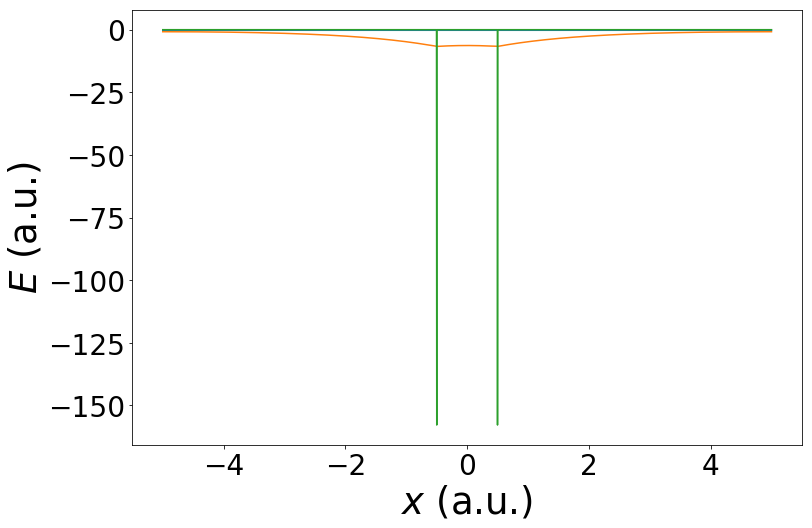

In [61]:
for i in range(0,1):
    
    plot(xvec,valuesI[0][i]*xvec/xvec)
    plot(xvec,10*(valuesI[1].T)[0]/np.sqrt( Ninteg2(xvec,(valuesI[1].T)[0]**2,-W,W,h) )+valuesI[0][i])
    

    print(valuesI[0][i])
plot(xvec,VI)
ylabel("$E$ (a.u.)",size=37)
xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 28})

In [81]:
shape(array(Eigvals).T[:][0])

(8,)

In [92]:
2*0.0005*12000/10

1.2

In [95]:
0.5* 1.660540*(10**(-27)) *(2*pi* 10**(13))

5.2167402649919946e-14

In [101]:
(0.5* 1.660540*(10**(-27)) *(2*pi* 10**(14))**2)*(1/(27.21*1.6*10**(-19)))*(0.529*10**(-10))**2

0.21068901961695707